In [1]:
import math
import numpy as np

In [2]:
def european_call_option(k, i):
    if(callstore[k][no_of_divisions+i] != -1.0): 
        return callstore[k][no_of_divisions+i]
    if (k == no_of_divisions):
        callstore[k][no_of_divisions+i] = max(0.0, (initial_stock_price*pow(up_factor, i)) - strike_price)
        return callstore[k][no_of_divisions+i]
    else:
        callstore[k][no_of_divisions+i] = (uptick_prob*european_call_option(k+1, i+1)
                                           + (1-uptick_prob)*european_call_option(k+1, i-1))/R
        return callstore[k][no_of_divisions+i]

def european_put_option(k, i):
    if(putstore[k][no_of_divisions+i] != -1.0): 
        return putstore[k][no_of_divisions+i]
    
    if (k == no_of_divisions):
        putstore[k][no_of_divisions+i] = max(0.0, strike_price - (initial_stock_price*pow(up_factor, (i))))
        return putstore[k][no_of_divisions+i]
    else:
        putstore[k][no_of_divisions+i] = (uptick_prob*european_put_option(k+1, i+1) 
                                         + (1-uptick_prob)*european_put_option(k+1, i-1))/R
        return putstore[k][no_of_divisions+i]

In [3]:
no_of_divisions = 1000
# value of option on ABC
risk_free_rate = 0.01
strike_price = 100
initial_stock_price = 101.17
expiration_time = 0.08333
volatility = 0.45

callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
for i in range(2*no_of_divisions+2):
    for j in range(2*no_of_divisions+2):
        callstore[i][j] = -1.0
        putstore[i][j] = -1.0
        
up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))

ABC_Call = european_call_option(0, 0)
ABC_Put = european_put_option(0, 0)
print("ABC_Call: ", ABC_Call)
print("ABC_Put:  ", ABC_Put)

# value of option on DEF
risk_free_rate = 0.01
strike_price = 150
initial_stock_price = 148.97
expiration_time = 0.08333
volatility = 0.37

callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
for i in range(2*no_of_divisions+2):
    for j in range(2*no_of_divisions+2):
        callstore[i][j] = -1.0
        putstore[i][j] = -1.0

up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))

DEF_Call = european_call_option(0, 0)
DEF_Put = european_put_option(0, 0)
print("DEF_Call: ", DEF_Call)
print("DEF_Put:  ", DEF_Put)

value_of_portfolio = 60*100*(ABC_Call + ABC_Put) + 40*100*(DEF_Call + DEF_Put)
print("V_P:      ", value_of_portfolio)

ABC_Call:  5.858589086274135
ABC_Put:   4.605293796077261
DEF_Call:  5.920232559424707
DEF_Put:   6.825289624128795
V_P:       113765.38602832238


# Question 1 Expected Shortfall with Normal Dist.

In [4]:
no_of_trails = 1000
no_of_divisions = 100
u_ABC = 0.0005
u_DEF = 0.0004
sd_ABC = 0.028
sd_DEF = 0.023
corr = 0.4

P_L = []
for i in range(no_of_trails):
    mean = [u_ABC, 
            u_DEF]
    cov = [[sd_ABC*sd_ABC,      sd_ABC*sd_DEF*corr],
           [sd_ABC*sd_DEF*corr, sd_DEF*sd_DEF]      ]
    
    log_S_ABC_percent_change, log_S_DEF_percent_change = np.random.multivariate_normal(mean, cov)
    
    S_ABC = 101.17 * math.exp(log_S_ABC_percent_change)
    S_DEF = 148.97 * math.exp(log_S_DEF_percent_change)
    
    risk_free_rate = 0.01
    strike_price = 100
    initial_stock_price = S_ABC        
    expiration_time = 0.08333 - (1/252) 
    volatility = 0.45

    callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    for i in range(2*no_of_divisions+2):
        for j in range(2*no_of_divisions+2):
            callstore[i][j] = -1.0
            putstore[i][j] = -1.0       

    up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
    R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
    uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))
    ABC_Call = european_call_option(0, 0)
    ABC_Put = european_put_option(0, 0)
    

    risk_free_rate = 0.01
    strike_price = 150
    initial_stock_price = S_DEF
    expiration_time = 0.08333 - (1/252) 
    volatility = 0.37

    callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    for i in range(2*no_of_divisions+2):
        for j in range(2*no_of_divisions+2):
            callstore[i][j] = -1.0
            putstore[i][j] = -1.0

    up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
    R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
    uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))

    DEF_Call = european_call_option(0, 0)
    DEF_Put = european_put_option(0, 0)

    
    value_of_portfolio = 60*100*(ABC_Call + ABC_Put) + 40*100*(DEF_Call + DEF_Put)
    P_L.append(-(value_of_portfolio - 113765.38602832238))

In [5]:
five_percent_VaR = -np.quantile(P_L, 0.05)
five_percent_VaR

8524.251724317932

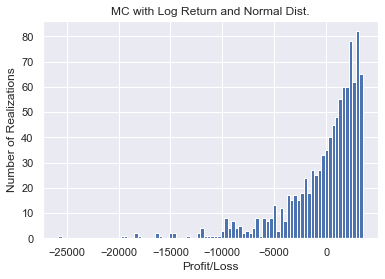

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
plt.hist(P_L, bins=88)
plt.xlabel('Profit/Loss')
plt.ylabel('Number of Realizations')
plt.title('MC with Log Return and Normal Dist.')
plt.show()

In [7]:
shortfall = [ loss for loss in P_L if loss < (-7129.85) ]
expected_shortfall = - sum(shortfall)/len(shortfall)
expected_shortfall

11179.136399142828

# Question 2 Expected Shortfall with bivariate t Dist.

In [8]:
def multivariate_t_rvs(m, S, df=np.inf, n=1):
    '''generate random variables of multivariate t distribution
    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))
    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal


In [9]:
no_of_trails = 1000
no_of_divisions = 100
u_ABC = 0.0005
u_DEF = 0.0004
sd_ABC = 0.028
sd_DEF = 0.023
corr = 0.4

P_L_t = []
for i in range(no_of_trails):
    mean = [u_ABC, 
            u_DEF]
    cov = [[0.5*sd_ABC*sd_ABC,      0.5*sd_ABC*sd_DEF*corr],
           [0.5*sd_ABC*sd_DEF*corr, 0.5*sd_DEF*sd_DEF]      ]
    
    rv = multivariate_t_rvs(mean, cov, 4, 1)
    
    log_S_ABC_percent_change = rv[0][0]
    log_S_DEF_percent_change = rv[0][1]
    
    
    S_ABC = 101.17 * math.exp(log_S_ABC_percent_change)
    S_DEF = 148.97 * math.exp(log_S_DEF_percent_change)
    
    risk_free_rate = 0.01
    strike_price = 100
    initial_stock_price = S_ABC        
    expiration_time = 0.08333 - (1/252) 
    volatility = 0.45

    callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    for i in range(2*no_of_divisions+2):
        for j in range(2*no_of_divisions+2):
            callstore[i][j] = -1.0
            putstore[i][j] = -1.0       

    up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
    R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
    uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))
    
    ABC_Call = european_call_option(0, 0)
    ABC_Put = european_put_option(0, 0)
    

    risk_free_rate = 0.01
    strike_price = 150
    initial_stock_price = S_DEF
    expiration_time = 0.08333 - (1/252) 
    volatility = 0.37

    callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    for i in range(2*no_of_divisions+2):
        for j in range(2*no_of_divisions+2):
            callstore[i][j] = -1.0
            putstore[i][j] = -1.0

    up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
    R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
    uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))

    DEF_Call = european_call_option(0, 0)
    DEF_Put = european_put_option(0, 0)

    
    value_of_portfolio = 60*100*(ABC_Call + ABC_Put) + 40*100*(DEF_Call + DEF_Put)
    P_L_t.append(-(value_of_portfolio - 113765.38602832238))

In [10]:
five_percent_VaR = -np.quantile(P_L_t, 0.05)
five_percent_VaR

7659.967008159751

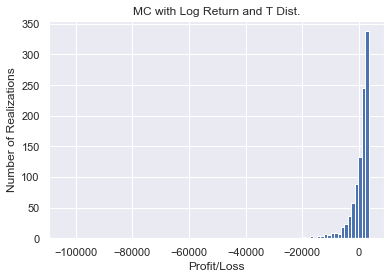

In [11]:
sns.set(color_codes=True)
plt.hist(P_L_t, bins=88)
plt.xlabel('Profit/Loss')
plt.ylabel('Number of Realizations')
plt.title('MC with Log Return and T Dist.')
plt.show()

In [12]:
shortfall = [ loss for loss in P_L_t if loss < (-7129.85) ]
expected_shortfall = - sum(shortfall)/len(shortfall)
expected_shortfall

17849.91254754127